In [46]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, average_precision_score
import xgboost as xgb
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline 
from sklearn import svm

import pickle 

In [47]:
#carga del data set
df_yoga = pd.read_csv("df_yoga.csv")

In [48]:
df_yoga.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,dog,0.498447,0.710348,-0.039102,0.999939,0.506710,0.720169,-0.029670,0.999940,0.508129,...,-0.031323,0.999465,0.361309,0.782000,0.116469,0.940308,0.356809,0.813006,-0.113764,0.998914
1,dog,0.498648,0.708269,-0.037543,0.999922,0.507020,0.719071,-0.027888,0.999923,0.508496,...,-0.038909,0.999441,0.360678,0.782175,0.110133,0.936818,0.349120,0.804334,-0.116835,0.998862
2,dog,0.498708,0.706592,-0.035661,0.999908,0.507188,0.717903,-0.025994,0.999910,0.508684,...,-0.042658,0.999432,0.360689,0.781994,0.106885,0.934546,0.347955,0.799926,-0.119793,0.998843
3,dog,0.498807,0.705788,-0.032820,0.999894,0.507286,0.717124,-0.022946,0.999894,0.508787,...,-0.043412,0.999427,0.360615,0.782066,0.105058,0.932294,0.346270,0.798927,-0.119829,0.998833
4,dog,0.498926,0.705852,-0.031277,0.999881,0.507392,0.717142,-0.021068,0.999879,0.508904,...,-0.043753,0.999433,0.360485,0.782550,0.105541,0.931712,0.345611,0.799010,-0.120647,0.998842


In [50]:
df_yoga.shape

(2615, 133)

In [51]:
X = df_yoga.drop(columns='class')
y = df_yoga['class']

In [41]:
X

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,0.498447,0.710348,-0.039102,0.999939,0.506710,0.720169,-0.029670,0.999940,0.508129,0.719717,...,-0.031323,0.999465,0.361309,0.782000,0.116469,0.940308,0.356809,0.813006,-0.113764,0.998914
1,0.498648,0.708269,-0.037543,0.999922,0.507020,0.719071,-0.027888,0.999923,0.508496,0.718723,...,-0.038909,0.999441,0.360678,0.782175,0.110133,0.936818,0.349120,0.804334,-0.116835,0.998862
2,0.498708,0.706592,-0.035661,0.999908,0.507188,0.717903,-0.025994,0.999910,0.508684,0.717603,...,-0.042658,0.999432,0.360689,0.781994,0.106885,0.934546,0.347955,0.799926,-0.119793,0.998843
3,0.498807,0.705788,-0.032820,0.999894,0.507286,0.717124,-0.022946,0.999894,0.508787,0.716863,...,-0.043412,0.999427,0.360615,0.782066,0.105058,0.932294,0.346270,0.798927,-0.119829,0.998833
4,0.498926,0.705852,-0.031277,0.999881,0.507392,0.717142,-0.021068,0.999879,0.508904,0.716875,...,-0.043753,0.999433,0.360485,0.782550,0.105541,0.931712,0.345611,0.799010,-0.120647,0.998842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,0.570864,0.233399,-0.195368,0.999552,0.557671,0.218516,-0.178261,0.999642,0.554720,0.217773,...,0.145278,0.957855,0.464830,0.719533,0.714074,0.814198,0.476665,0.746443,0.138006,0.972529
2611,0.570960,0.237637,-0.164213,0.999561,0.557861,0.223691,-0.145642,0.999647,0.554893,0.223058,...,0.155348,0.959621,0.462153,0.719781,0.713742,0.819519,0.474496,0.748239,0.143351,0.973579
2612,0.570983,0.242015,-0.168366,0.999564,0.558009,0.228918,-0.150346,0.999646,0.555036,0.228324,...,0.149320,0.960892,0.462631,0.721146,0.665403,0.821962,0.474907,0.750792,0.128556,0.974222
2613,0.570095,0.247829,-0.144893,0.999573,0.557314,0.234792,-0.128160,0.999652,0.554108,0.234133,...,0.155870,0.961993,0.462017,0.726602,0.663100,0.823634,0.473765,0.754547,0.131062,0.974538


In [52]:
y.unique()

array(['dog', 'chair'], dtype=object)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [54]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

test_slip = int((X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]))*100)
train_slip = int((X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]))*100)


print(f'Split Train/Test: {int(train_slip)}%-{int(test_slip)}%')


X_train shape:  (2092, 132)
X_test shape:  (523, 132)
y_train shape:  (2092,)
y_test shape:  (523,)
Split Train/Test: 80%-20%


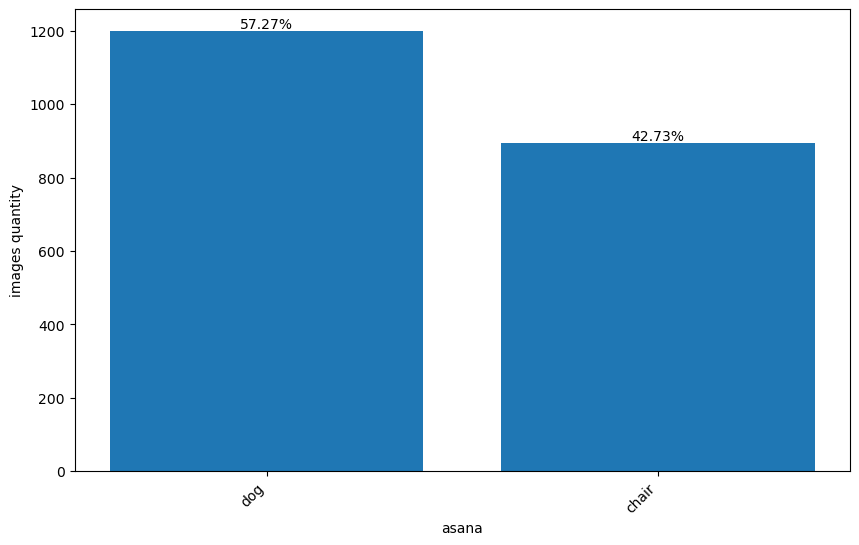

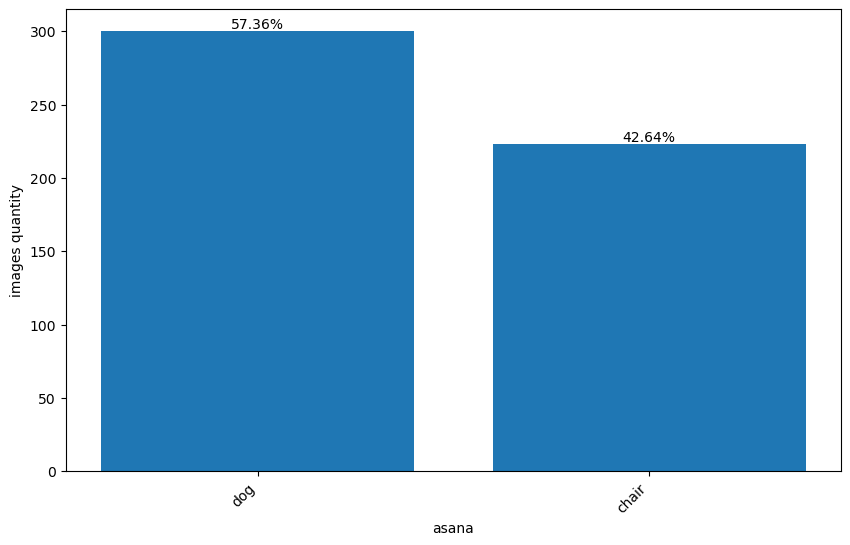

In [55]:
# Calcular counts y porcentajes
for i in (y_train, y_test): 
    valid_categories = i
    category_counts = valid_categories.value_counts()
    total_count = len(valid_categories)
    category_percentages = (category_counts / total_count) * 100

    # Grafico
    plt.figure(figsize=(10, 6))
    bars = plt.bar(category_counts.index, category_counts)
    plt.xlabel("asana")
    plt.ylabel("images quantity")

    # Agregar porcentajes sobre las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        category = category_counts.index[i]
        if category in category_percentages:
            percentage = category_percentages[category]
            plt.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.2f}%", ha="center", va="bottom")

    plt.xticks(rotation=45, ha="right")
    plt.show()

In [56]:
pipelines = {
    #'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier(class_weight = 'balanced')),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 1000, criterion = 'entropy')),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators = 1000)),
    'svm':make_pipeline(StandardScaler(), svm.SVC(kernel='rbf', class_weight = 'balanced'))
}

In [57]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [58]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

rc 1.0
rf 1.0
gb 1.0
svm 1.0


In [63]:
with open('yoga_pose_detection.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)